<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Potencias </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('Data/numericos.csv')
df.head()

,0,1,2
0,0.255228,0.902346,0.733752
1,0.226339,0.925600,0.385178
2,0.205234,0.921390,0.547819
3,0.231553,0.885718,0.880428
4,0.185737,0.889161,0.953430


In [3]:
df.skew()

0    6.000314
1   -2.772736
2   -1.012379
dtype: float64

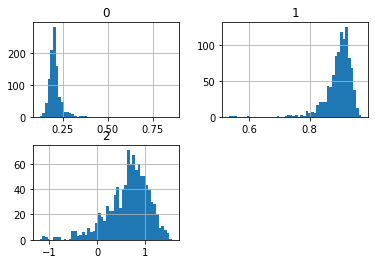

In [6]:
df.hist(bins=50);

In [7]:
# Compensando la variable '0'
 # Variable desplazada a 1
df_copia = df.copy()
x = df['0'] - df['0'].min() +1 #variable desplazada a 1

In [11]:
a = -11
df_copia['0'] = x**a
df_copia['0'].skew()

0.04181647238238833

In [12]:
# Compensando la variable '1'
x = df['1'] - df['1'].min()+1

In [17]:
a=17
df_copia['1']=x**a
df_copia['1'].skew()

-0.027448039332947635

In [19]:
# Compensando la variable '2'
x = df['2'] - df['2'].min()+1
a=3
df_copia['2']=x**a
df_copia['2'].skew()

0.03113961761990119

Aplicando una transformación de la forma
$$
x'=x^a,
$$
donde $x\in[1,\infty)$, obtuvimos los siguientes exponentes para cada variable

Variable|Sesgo original|$a$
--|--|--
'0'|6.0|-11
'1'|-2.77|17
'2'|-1.01|3

---

# Familia de transformaciones de potencia
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
haciendo $\displaystyle\lim_{\lambda\rightarrow0}\frac{x^\lambda-1}{\lambda}$ se tiene
$$
x'=\ln(x).
$$

In [20]:
LMB = [-1,0.5,0,2,3,4]
x = np.linspace(0.1,10,100)

In [21]:
def potencia(x,lmb):
    if lmb==0:
        return np.log(x)
    else:
        return (x**lmb - 1)/lmb

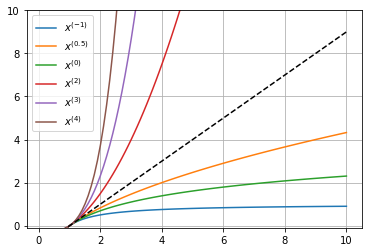

In [22]:
for lmb in LMB:
    xp = potencia(x,lmb)
    plt.plot(x,xp,label='$x^{(' + str(lmb) + ')}$')
plt.plot(x,x-1,'--k')
plt.legend()
plt.ylim([-0.1,10])
plt.grid()

## Transformación Box-Cox
$$
x'=\left\{\begin{array}{lr}
\dfrac{x^\lambda-1}{\lambda} & \lambda\neq0\\
\ln(x) & \lambda=0
\end{array}\right.
$$

In [23]:
from scipy.stats import boxcox

In [25]:
sesgo = pd.read_csv('Data/sesgo.csv')
sesgo.head()

,1.0,1.1,1.2,1.4,1.5,2.5,3.0,0.7,0.6,0.8,...,0.4,-1.0,-0.8,-0.6,-0.5,-2.0,-1.5,-1.3,-2.5,-3.0
0,4.287419,4.078224,2.410316,1.864664,11.968746,-0.403019,0.473020,4.975822,3.037414,2.892491,...,0.838508,5.541238,4.947706,3.559693,7.864133,22.867150,22.242351,22.833589,21.672629,2.851895
1,6.692587,6.596364,-0.467649,4.196815,9.522961,-0.366849,0.211353,1.000911,1.497043,2.665020,...,1.213810,4.015426,7.715773,6.496774,5.833801,18.040815,22.122988,18.310630,21.197021,3.053828
2,-0.819270,4.103274,4.688828,18.312546,2.117002,1.013405,1.833604,1.384706,1.280363,1.323454,...,0.651702,4.326238,6.220713,6.069229,6.683796,17.974879,22.887790,20.971000,21.943924,2.238959
3,5.672147,9.812692,3.346832,3.747159,5.877766,0.301435,0.600947,5.362018,1.802270,1.125108,...,-0.269047,2.653640,4.028626,5.179591,7.848438,19.794348,9.135971,20.998770,23.036033,2.654808
4,9.830451,6.852189,4.727676,5.559866,8.410474,-0.688940,0.687187,1.246853,4.331011,2.225794,...,1.212628,4.807444,5.027868,6.155622,6.578262,20.652663,22.326100,21.320919,21.590493,2.774718


In [28]:
lmb = np.linspace(-20,20,100)
mejor_exp = {}
for v in sesgo:
    x = sesgo[v] - sesgo[v].min() + 1 #variable desplazada
    sp = [pd.DataFrame(boxcox(x,lmb)).skew().values[0] for lmb in LMB]
    idx = np.argmin(np.abs(sp))
    mejor_exp[v] = (LMB[idx], sp[idx]) # (mejor exponente, mejor sesgo)
mejor_exp

{'1.0': (0, -0.35299940437156685),
 '1.1': (0, -0.36301124937907747),
 '1.2': (0, -0.12621718702668058),
 '1.4': (0, 0.01170896940697781),
 '1.5': (0, -0.25227818308903077),
 '2.5': (-1, -0.5077344886757249),
 '3.0': (-1, 0.3324853748036874),
 '0.7': (0.5, 0.1774344976261497),
 '0.6': (0.5, 0.03002131046971891),
 '0.8': (0.5, 0.20715551062708323),
 '0.5': (0.5, -0.08036352534127693),
 '0.4': (0.5, -0.12550128256455118),
 '-1.0': (3, 0.24847620494380168),
 '-0.8': (2, -0.04577845391022746),
 '-0.6': (2, 0.02116213316281367),
 '-0.5': (2, 0.2707479044230265),
 '-2.0': (4, -0.43786090454821214),
 '-1.5': (4, -0.16941674301606524),
 '-1.3': (3, -0.1420264342283233),
 '-2.5': (4, -0.7107354353886014),
 '-3.0': (4, -1.0145837863668994)}

In [29]:
for v in sesgo:
    x = sesgo[v] - sesgo[v].min() + 1
    xp, lmb = boxcox(x)
    mejor_exp[v]=(lmb, pd.DataFrame(xp).skew().values[0])
mejor_exp

{'1.0': (0.244788176968345, 0.00557500588573536),
 '1.1': (0.229641079078813, 0.010878583146257193),
 '1.2': (0.08696682230716642, 0.006651691699217191),
 '1.4': (-0.007771559587673352, -0.0005232289728475841),
 '1.5': (0.14304202195785662, 0.0050410603027282695),
 '2.5': (-0.6532329142943955, -0.03137496816478265),
 '3.0': (-1.1825565521106125, 0.21465245560809507),
 '0.7': (0.34712049518269683, 0.009126604816202338),
 '0.6': (0.4905670983480438, 0.01898569770298523),
 '0.8': (0.33957520002158437, 0.012797063771885902),
 '0.5': (0.59883686398365, 0.026801017222397944),
 '0.4': (0.6421923492912538, 0.023595708438760517),
 '-1.0': (2.4406073674470483, -0.019749856805679998),
 '-0.8': (1.9440037421315555, -0.0794718947715581),
 '-0.6': (1.8593313784717624, -0.053057464482121126),
 '-0.5': (1.6161183191554247, 0.010824443114979477),
 '-2.0': (4.564234277668849, -0.27364335762642106),
 '-1.5': (3.705057611613298, -0.25578637797862946),
 '-1.3': (2.8461653717668285, -0.20582420441758756),
 

---
Uso de valores negativos para $x$:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|+1),&\lambda=0
  \end{array}.
  \right.
$$

In [30]:
x = np.linspace(-10,10,500)
LMB = [-1,0.5,0,2,3,4]

In [32]:
def potenciaS(x,lmb):
    if lmb==0:
        return np.sign(x)*np.log(abs(x)+1)
    else:
        return np.sign(x)*((abs(x) + 1)**lmb -1)/lmb

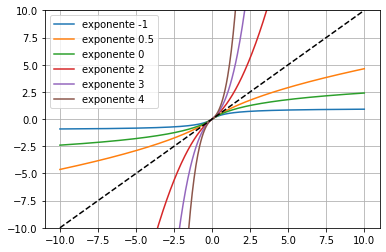

In [33]:
for lmb in LMB:
    xp=potenciaS(x,lmb)
    plt.plot(x,xp,label='exponente {}'.format(lmb))
plt.plot(x,np.sign(x)*(abs(x)), '--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

## Yeo-Johnson
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda_1}-1}{\lambda_1} & \lambda_1\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda_1=0,\quad x\geq0\\
  -\frac{(-x+1)^{\lambda_2}-1}{\lambda_2} & \lambda_2\neq0,\quad x<0\\
  -\ln(-x+1) & \lambda_2=0,\quad x<0.
  \end{array}
  \right.
$$
Donde $\lambda_1+\lambda_2=2$.

Se sustituye $\lambda_2=2-\lambda_1$.
$$
x'=\left\{
  \begin{array}{lr}
  \frac{(x+1)^{\lambda}-1}{\lambda} & \lambda\neq0,\quad x\geq0\\
  \ln(x+1) & \lambda=0,\quad x\geq0\\
  -\frac{(-x+1)^{2-\lambda}-1}{2-\lambda} & \lambda\neq2,\quad x<0\\
  -\ln(-x+1) & \lambda=2,\quad x<0.
  \end{array}
  \right.
$$

In [36]:
from scipy.stats import yeojohnson

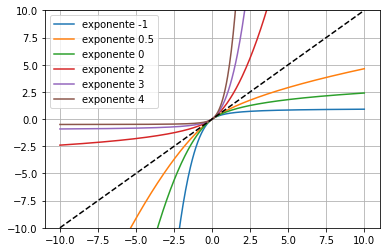

In [37]:
for lmb in LMB:
    xp = yeojohnson(x,lmb)
    plt.plot(x,xp,label='exponente {}'.format(lmb))
plt.plot(x,np.sign(x)*(abs(x)), '--k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

(-12.750781894524401, -0.09169692603119495)

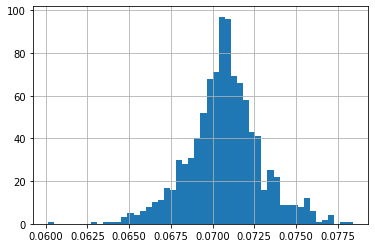

In [38]:
df_copia['0'], l = yeojohnson(df['0'])
df_copia['0'].hist(bins=50)
l,df_copia['0'].skew()

(22.18399892603115, -0.08515931210418183)

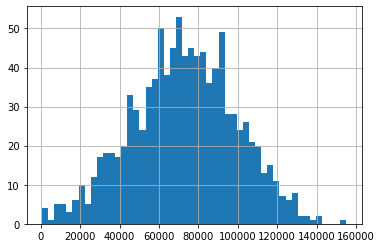

In [39]:
df_copia['1'], l = yeojohnson(df['1'])
df_copia['1'].hist(bins=50)
l,df_copia['1'].skew()

(2.0334009440523304, -0.051931710513484226)

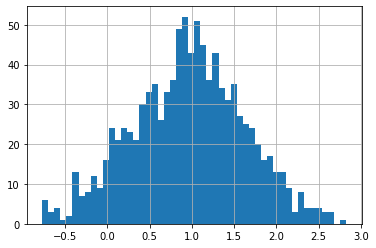

In [40]:
df_copia['2'],l=yeojohnson(df['2'])
df_copia['2'].hist(bins=50)
l,df_copia['2'].skew()

---
# Regresión

In [41]:
reg = pd.read_csv('Data/regresion.csv')
reg.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


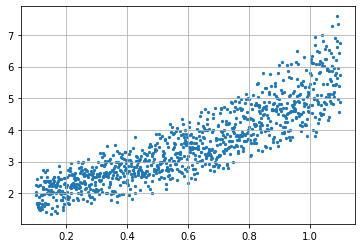

In [43]:
plt.scatter(reg['x'],reg['y'], s=5)
plt.grid()

(-0.1640699985520419, 0.01023234941161347)

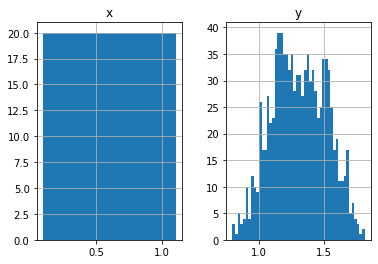

In [45]:
reg_copia = reg.copy()
reg_copia['y'],l = yeojohnson(reg['y'])
reg_copia.hist(bins=50)
l, reg_copia['y'].skew()

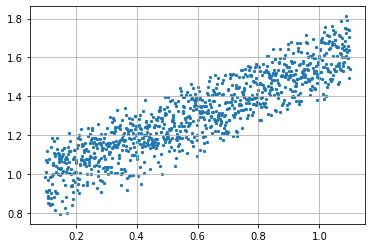

In [46]:
plt.scatter(reg['x'],reg_copia['y'], s=5)
plt.grid()

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
X,x,Y,y = train_test_split(reg_copia[['x']], reg_copia['y'])
lin=LinearRegression()
lin.fit(X,Y)

LinearRegression()

In [50]:
from sklearn.preprocessing import PowerTransformer

In [53]:
tranformer = PowerTransformer(standardize=False)
tranformer.fit(reg[['y']])
l,tranformer.lambdas_

(-0.1640699985520419, array([-0.16407]))

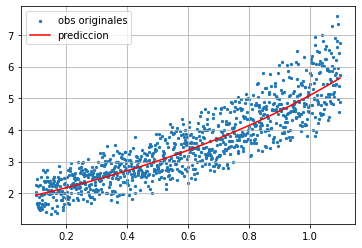

In [56]:
plt.scatter(reg['x'], reg['y'], s=5, label='obs originales')
f = lin.predict(reg[['x']])
plt.plot(reg['x'], tranformer.inverse_transform(f.reshape(-1,1)), 'r', label='prediccion')
plt.legend()
plt.grid()